**A classification on the color of the wine**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/186/data.csv'
df = pd.read_csv(data_url)

print(df)


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

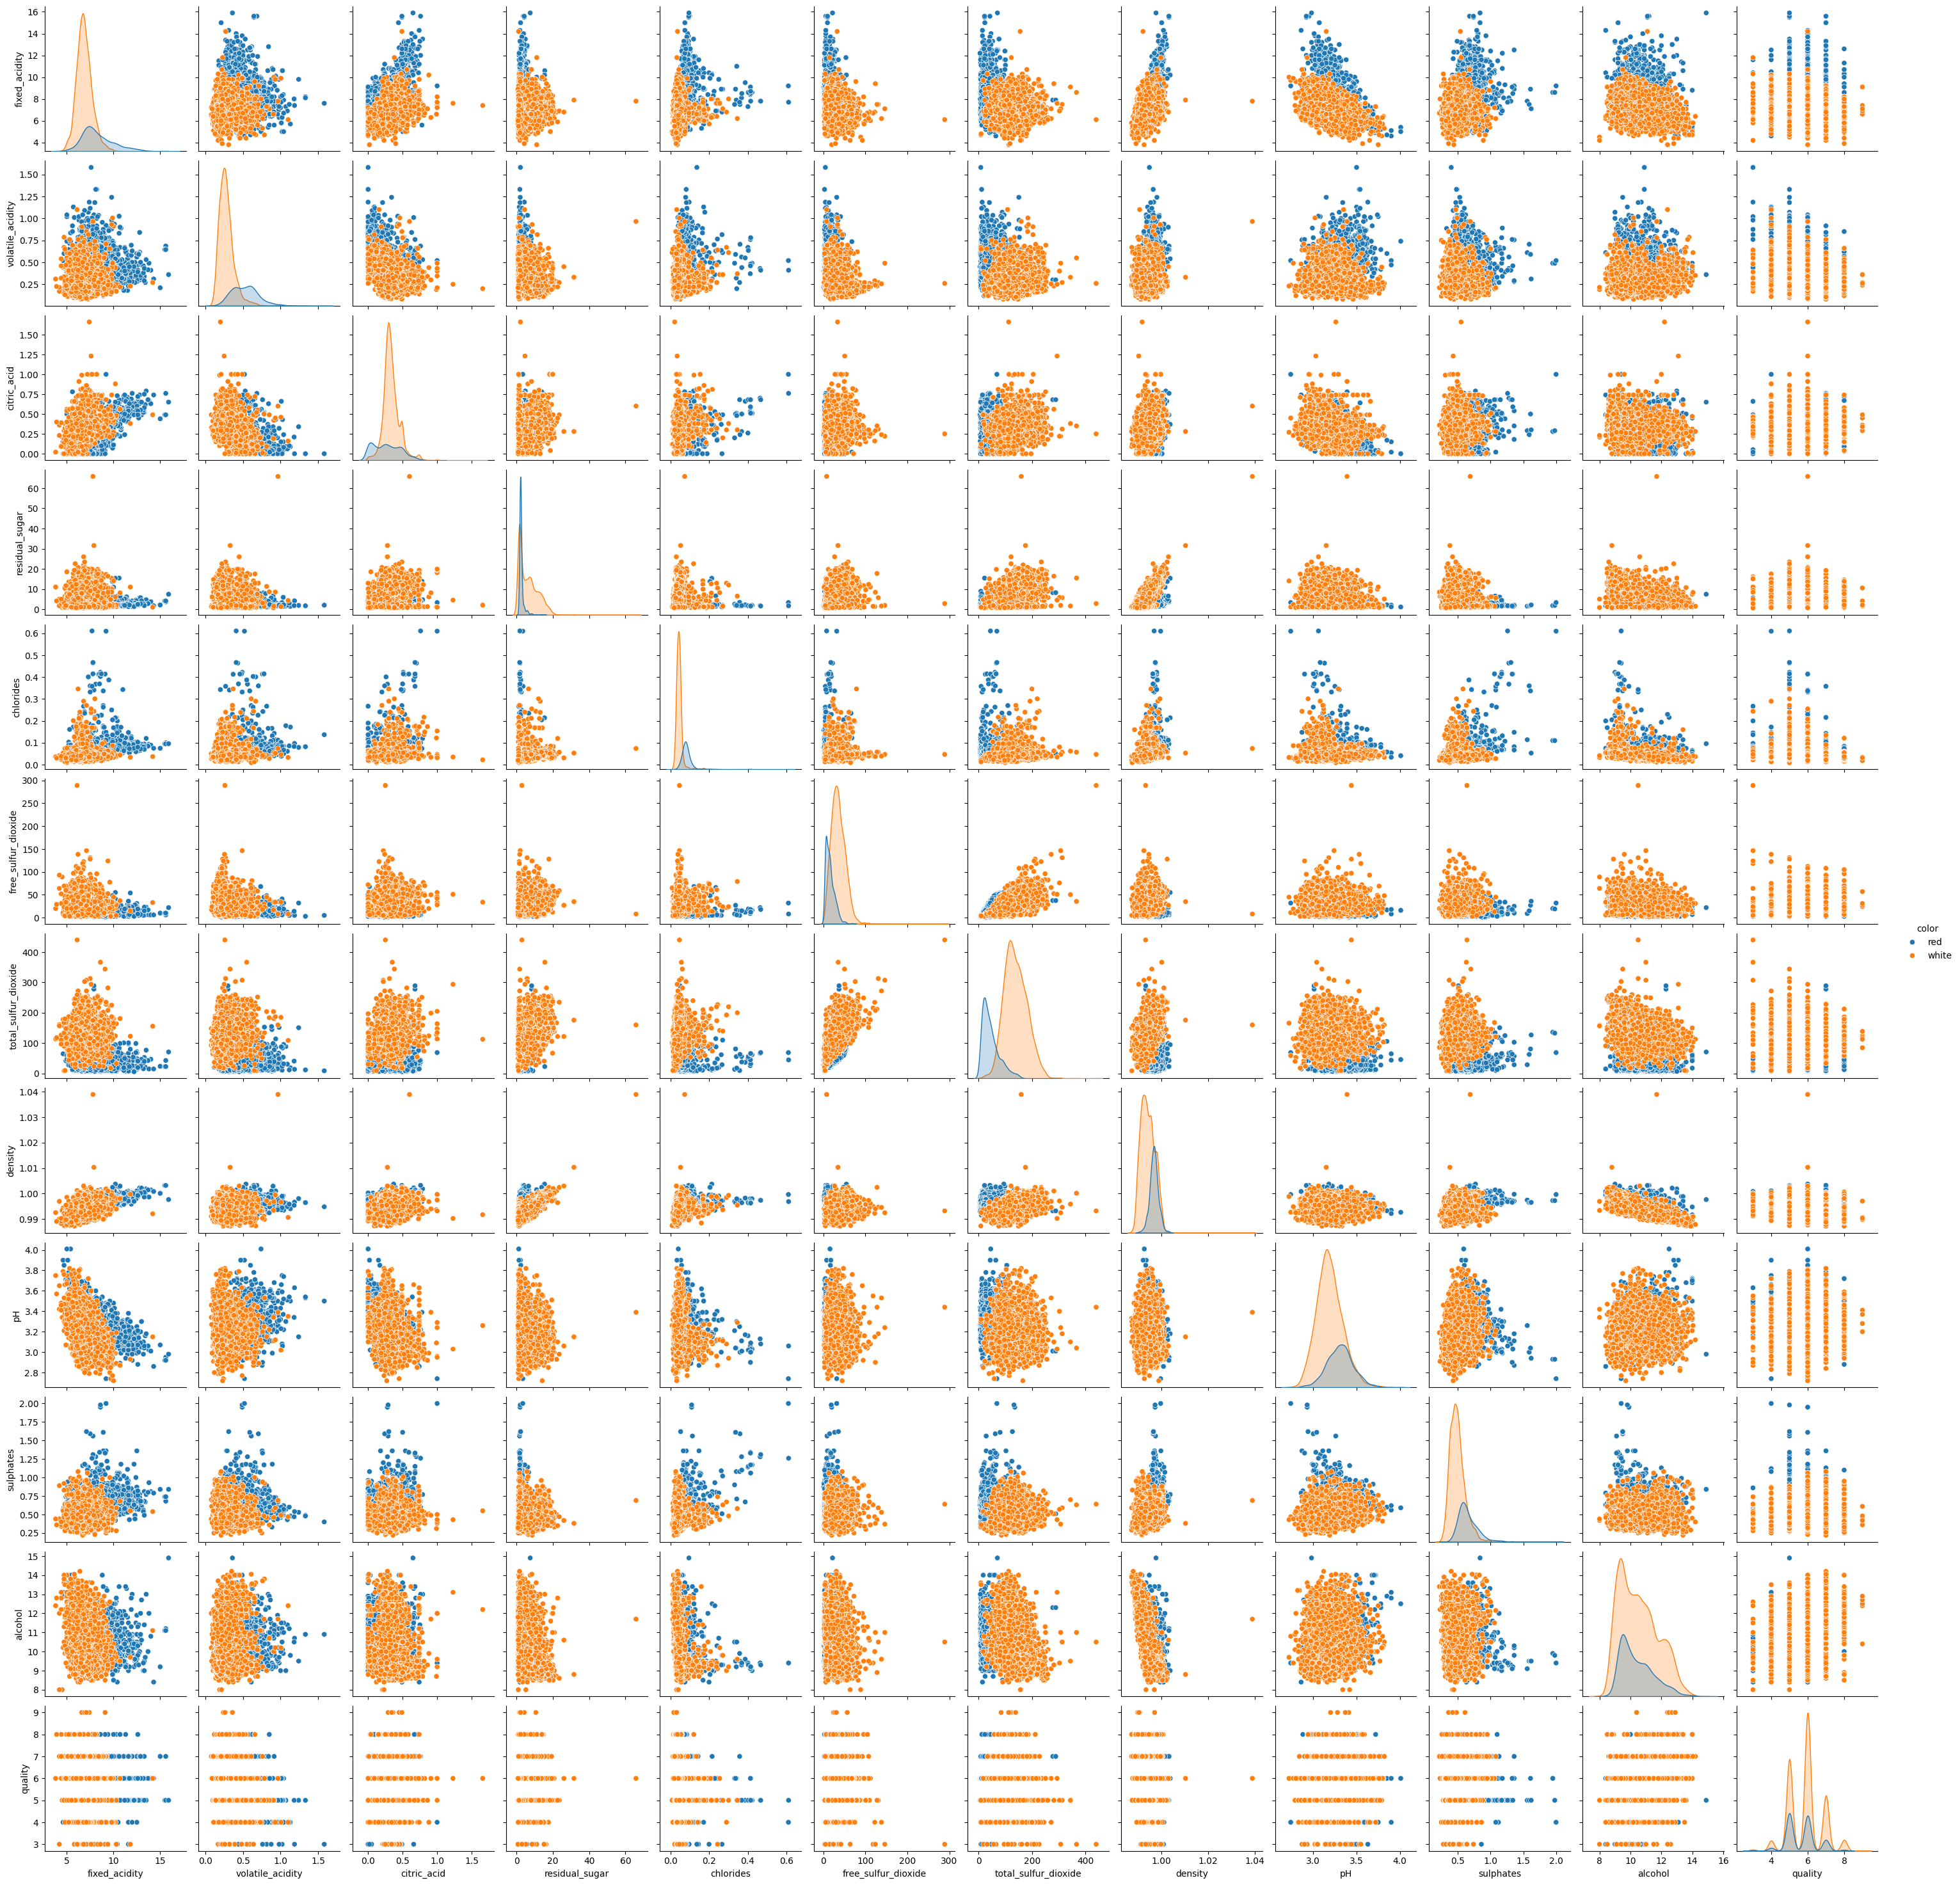

In [ ]:
# Visualize the color of the wine with respect to features
sns.pairplot(df, hue='color')
plt.show()

In [ ]:
# Prepare the data for classification
X = df.drop('color', axis=1)
y = df['color']

In [ ]:
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [ ]:
print(y)

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict the color of the wine on the training set
y_train_pred = pipeline.predict(X_train)

# Predict the color of the wine on the testing set
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy of the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Calculate the accuracy of the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.99
Testing Accuracy: 0.99


In [ ]:
# Generate the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix (Training Set):')
print(conf_matrix_train)

# Generate the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix (Testing Set):')
print(conf_matrix_test)

Confusion Matrix (Training Set):
[[1083   14]
 [   9 3441]]
Confusion Matrix (Testing Set):
[[ 491   11]
 [  10 1438]]


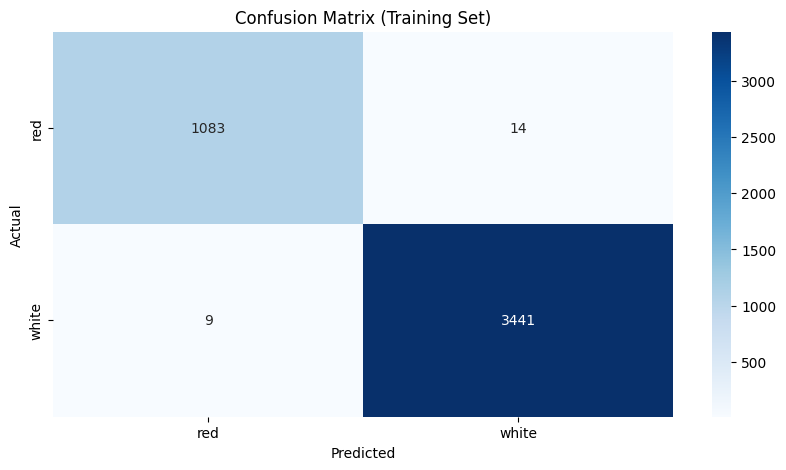

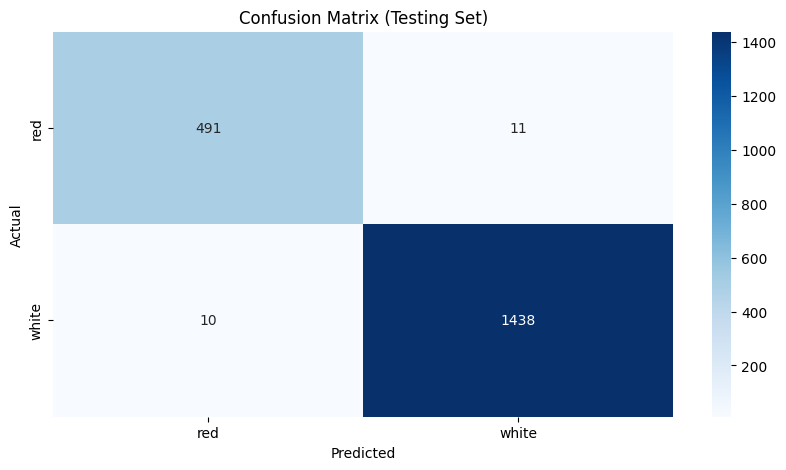

In [ ]:
# Visualize the confusion matrix for the training set
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the confusion matrix for the testing set
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate the performance metrics for the testing set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate false alarm rate and missed detection rate
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
false_alarm_rate = fp / (fp + tn)
missed_detection_rate = fn / (fn + tp)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'False Alarm Rate: {false_alarm_rate:.2f}')
print(f'Missed Detection Rate: {missed_detection_rate:.2f}')


Precision: 0.99
Recall: 0.99
F1-Score: 0.99
False Alarm Rate: 0.02
Missed Detection Rate: 0.01


**Analysis of the Results**

The dataset contains 6,497 samples of wine, each described by 12 features related to its chemical properties and quality, along with a target variable 'color' indicating whether the wine is red or white. The dataset was split into 70% training and 30% testing.

Based on the results above, the performance metrics show pretty good results:

1. Accuracy (0.99): The model correctly classifies 99% of the wine samples in both the training and testing sets. This high accuracy indicates that the model is highly effective at distinguishing between red and white wines.

2. Precision (0.99): Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.99 means that 99% of the wines predicted as a certain color (either red or white) are actually of that color. This indicates a very low rate of false positives.

3. Recall (0.99): Recall measures the proportion of true positive predictions among all actual positives. A recall of 0.99 means that 99% of the actual wines of a certain color are correctly identified by the model. This indicates a very low rate of false negatives.

4. F1-Score (0.99): The F1-Score is the harmonic mean of precision and recall. An F1-Score of 0.99 suggests a balanced and high performance in terms of both precision and recall.

5. False Alarm Rate (0.02): This is the proportion of false positives among all negative cases. A false alarm rate of 0.02 indicates that only 2% of the wines predicted as a certain color are incorrectly classified.

6. Missed Detection Rate (0.01): This is the proportion of false negatives among all positive cases. A missed detection rate of 0.01 indicates that only 1% of the actual wines of a certain color are missed by the model.

Confusion Matrix Analysis

Training Set: The model has very few misclassifications, with only 14 false positives and 9 false negatives out of 4,547 samples.
Testing Set: Similarly, the model performs well on the testing set, with only 11 false positives and 10 false negatives out of 1,950 samples.

In summary, the model demonstrates excellent performance in classifying the color of wine, with high accuracy, precision, recall, and F1-Score. The low false alarm and missed detection rates further confirm the model's reliability. Given these metrics, the model is highly effective and can be confidently used for predicting the color of wine based on its chemical properties.